In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import shutil
from collections import Counter
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

from gradcam import grad_cam, grad_cam_plus, get_heatmap
import cv2
from PIL import Image

In [2]:
seed = 2802
test_size = 0.2
num_classes = 3
batch_size = 64

input_dir = "data/images"
target_dir = "data/mask"

input_shape = (320,320)

model_name = 'small_alexnet_adam_0.000001_weighted_f_64_192'

In [3]:
df = pd.read_csv('data/dataset_train_test.csv') 
df['path'] = input_dir+'/'+df['image_name']+'.jpg'
df['category'] = np.where(df['class']==1, 'NB', np.where(df['class']==2, 'NB', 'BB'))

df.head()

,Unnamed: 0,image_name,part,section,min_height,max_height,diff_height,piece_position,class,image_id,set,path,category
0,0,P01_001_0,P01,0,181,200,19,Down,2,1,Train,data/images/P01_001_0.jpg,NB
1,1,P01_001_1,P01,1,198,208,10,Down,1,1,Train,data/images/P01_001_1.jpg,NB
2,2,P01_001_2,P01,2,204,214,10,Down,1,1,Train,data/images/P01_001_2.jpg,NB
3,3,P01_001_3,P01,3,200,212,12,Down,1,1,Train,data/images/P01_001_3.jpg,NB
4,4,P01_002_0,P01,0,232,238,6,Down,1,2,Train,data/images/P01_002_0.jpg,NB


In [4]:
datagen_normal = ImageDataGenerator(rescale=1./255)

train_generator_normal = datagen_normal.flow_from_dataframe(
    df[df['set']=='Train'],
    x_col='path', 
    y_col='category', 
    target_size=input_shape, 
    batch_size=batch_size,
    seed=seed,
    class_mode="raw",
    shuffle=True,)
    #save_to_dir=aug_dir, save_prefix='aug', save_format='png')

validation_generator_normal = datagen_normal.flow_from_dataframe(
    df[df['set']=='Test'],
    x_col='path', 
    y_col='category', 
    target_size=input_shape, 
    batch_size=batch_size,
    class_mode="raw",
    seed=seed,
    shuffle=True,)
    #save_to_dir=aug_dir, save_prefix='aug', save_format='png')

Found 856 validated image filenames.
Found 215 validated image filenames.


In [5]:
images = validation_generator_normal.next()

In [6]:
images[1]=='BB'

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False])

In [7]:
model_ft = tf.keras.models.load_model('results/'+model_name)

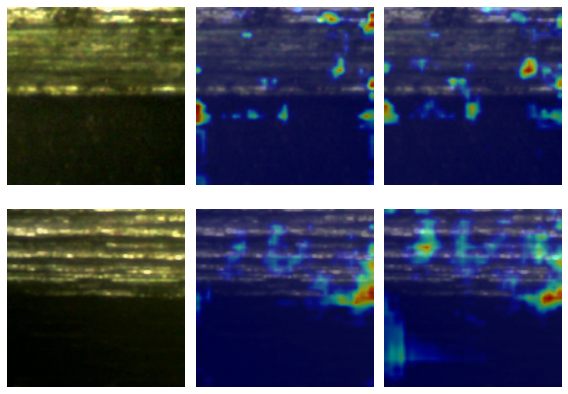

In [8]:
fig, ax = plt.subplots(2,3, figsize=(8, 6))
for cont,i in zip(range(2),[2,25]):
    image = images[0][i,:,:,:]
    
    ax[cont][0].imshow(image)
    ax[cont][0].axis('off')   
    
    heatmap_ft = grad_cam(model_ft, image, 'batch2', ['NB', 'BB'])
    mask_ft = get_heatmap((image*255).astype('uint8'), heatmap_ft, alpha=0.5)
    
    heatmap_ft = grad_cam_plus(model_ft, image, 'batch2', ['NB', 'BB'])
    mask_ft_plus = get_heatmap((image*255).astype('uint8'), heatmap_ft, alpha=0.5)
    
    ax[cont][1].imshow(mask_ft)
    ax[cont][1].axis('off')
    ax[cont][2].imshow(mask_ft_plus)
    ax[cont][2].axis('off')
    
plt.tight_layout()
plt.savefig('results/img_grad_cam_nb.png', dpi=600)
plt.show()

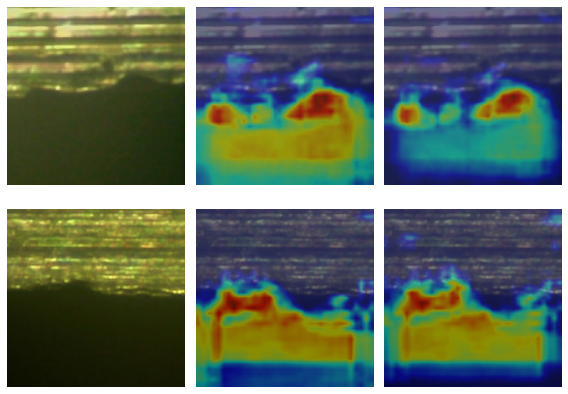

In [9]:
fig, ax = plt.subplots(2,3, figsize=(8, 6))
for cont,i in zip(range(2),[18,24]):
    image = images[0][i,:,:,:]
    
    ax[cont][0].imshow(image)
    ax[cont][0].axis('off')   
    
    heatmap_ft = grad_cam(model_ft, image, 'batch2', ['NB', 'BB'])
    mask_ft = get_heatmap((image*255).astype('uint8'), heatmap_ft, alpha=0.5)
    
    heatmap_ft = grad_cam_plus(model_ft, image, 'batch2', ['NB', 'BB'])
    mask_ft_plus = get_heatmap((image*255).astype('uint8'), heatmap_ft, alpha=0.5)
    
    ax[cont][1].imshow(mask_ft)
    ax[cont][1].axis('off')
    ax[cont][2].imshow(mask_ft_plus)
    ax[cont][2].axis('off')
    
plt.tight_layout()
plt.savefig('results/img_grad_cam_bb.png', dpi=600)
plt.show()